### Линейная полиномиальная регрессия [Домашнее задание]

**Примечание:**

> Пожалуйста, не удаляйте комментарии или строки кода.

1. Пожалуйста, реализуйте функцию ```load_data(filename=None)```, которая будет загружать данные файла csv из ```filename``` и возвращать ```DataFrame```.

In [11]:
import pandas as pd

def load_data(filename=None):
    #Начало вашего кода
    df = pd.read_csv(filename)
    df = df.drop("Id", axis=1)
    return df
    #Конец вашего кода

num_data = load_data(filename="num_house_prices.csv")
num_data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1334,20,13175,6,6,1978,1988,119.0,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1335,70,9042,7,9,1941,2006,0.0,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1336,20,9717,5,6,1950,1996,0.0,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


### Ожидаемые результаты:

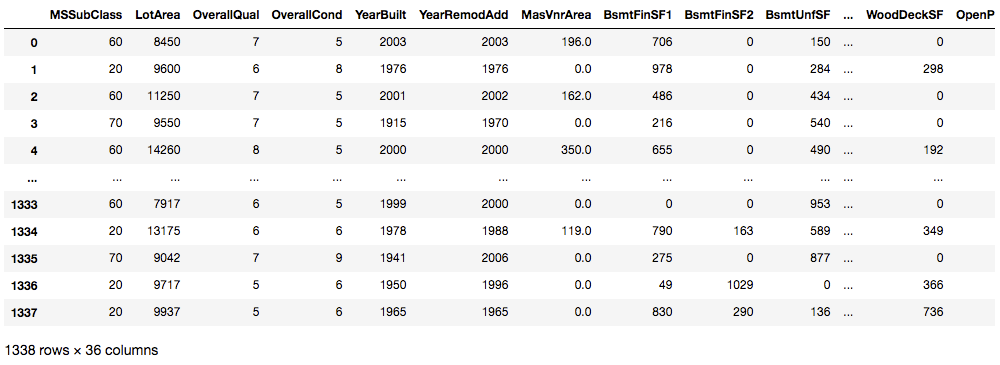

2. Пожалуйста, реализуйте функцию ```split_data(data, ratio=0.1)```, которая разбивает набор данных, загруженный в предыдущем вопросе, на наборы данных ```train``` и ```validation``` в соотношении 9:1.

In [12]:
import numpy as np

def split_data(data, ratio=0.1):
    np.random.seed(1)
    #Начало вашего кода    
    indices = np.arange(0, data.index.size)
    
    np.random.shuffle(indices)
    
    val_indices = indices[:round(ratio * data.index.size)]
    train_indices = indices[round(ratio * data.index.size):]
    
    val_data = data.iloc[val_indices]
    train_data = data.iloc[train_indices]
    #Конец вашего кода
    return {"validation":val_data, "train":train_data}

splitted_data = split_data(num_data, ratio=0.1)

In [13]:
splitted_data["validation"].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
559,20,7943,4,5,1961,1961,192.0,903,0,126,...,64,0,39,0,0,0,0,4,2007,118500
1087,60,8935,7,5,2002,2002,95.0,0,0,831,...,144,68,0,0,0,0,0,7,2009,195000
1020,20,12085,8,5,2007,2007,328.0,1004,0,730,...,0,0,0,0,0,0,0,11,2007,318000
460,60,9803,7,5,2005,2005,0.0,400,0,466,...,0,108,0,0,0,0,0,2,2008,226700
802,20,8892,5,7,1953,1996,0.0,0,0,105,...,196,0,150,0,0,0,0,10,2008,116000


### Ожидаемые результаты:

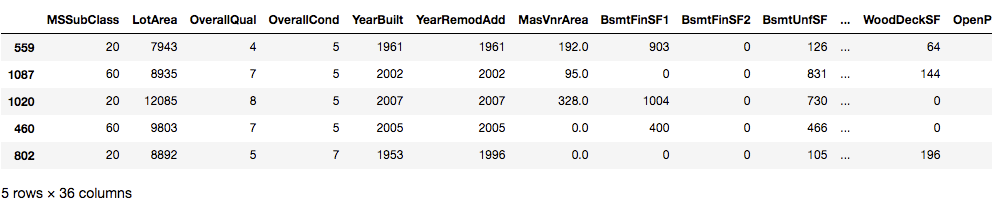

In [14]:
splitted_data["train"].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
355,60,12474,10,5,2007,2008,272.0,1280,0,402,...,196,134,0,0,0,0,0,8,2008,426000
1316,20,8400,6,9,1962,2005,237.0,0,0,1319,...,0,36,0,0,0,0,0,7,2008,174000
133,30,6120,5,7,1931,1993,0.0,209,0,506,...,48,0,0,0,0,0,0,11,2009,105000
181,20,10125,6,6,1977,1977,0.0,641,279,276,...,238,83,0,0,0,0,0,2,2008,171500
1133,20,9037,8,5,2006,2006,32.0,428,0,1048,...,120,33,0,0,0,0,0,12,2007,265900


### Ожидаемые результаты:

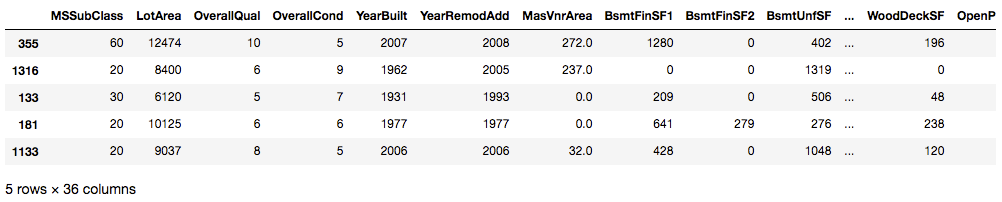

3. Пожалуйста, визуализируйте коэффициенты корреляции для набора данных ```train```.

Примечание: ```figsize=(10,8)```

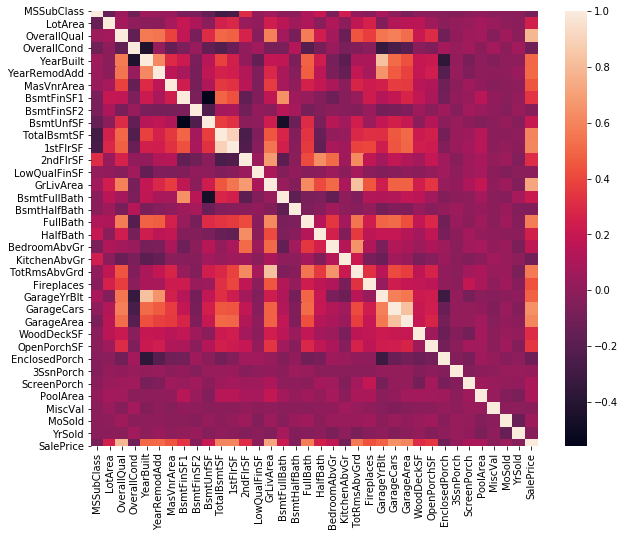

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

#Начало вашего кода 
fig = plt.figure(figsize=(10,8))
sns.heatmap(splitted_data["train"].corr());
#Конец вашего кода

### Ожидаемые результаты:

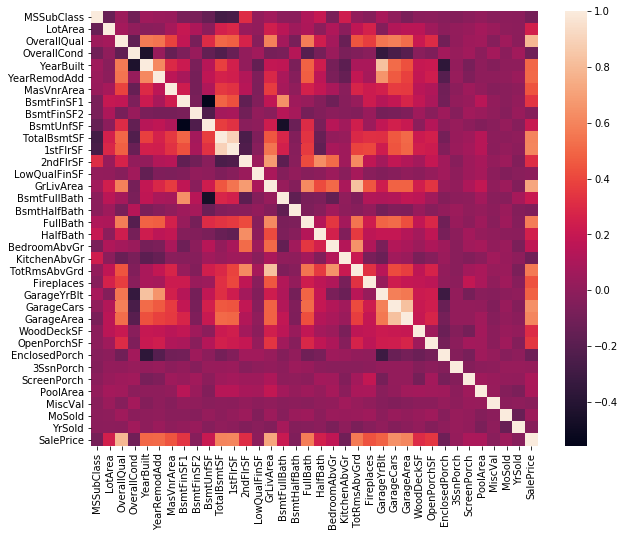

4. Теперь выберите топ 9 наиболее коррелированных параметров с ```"SalePrice"``` и назначьте результаты списку ```important```. Теперь визуализируйте коэффициенты корреляции этих параметров (переменных).

    Примечание: ```figsize=(8,8)```

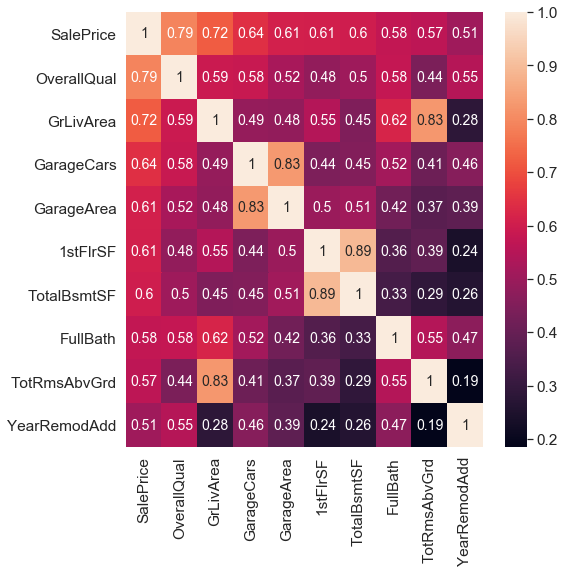

In [50]:
#Начало вашего кода 
corr = splitted_data["train"].corr()
important = abs(corr["SalePrice"]).sort_values(ascending=False).iloc[1:10].index.tolist()
sale_price = abs(corr["SalePrice"]).sort_values(ascending=False).iloc[:10].index.tolist()
#Конец вашего кода
fig = plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(splitted_data["train"][sale_price].corr(), annot=True, annot_kws={"size": 14});
plt.ylim(10, 0);



### Ожидаемые результаты:


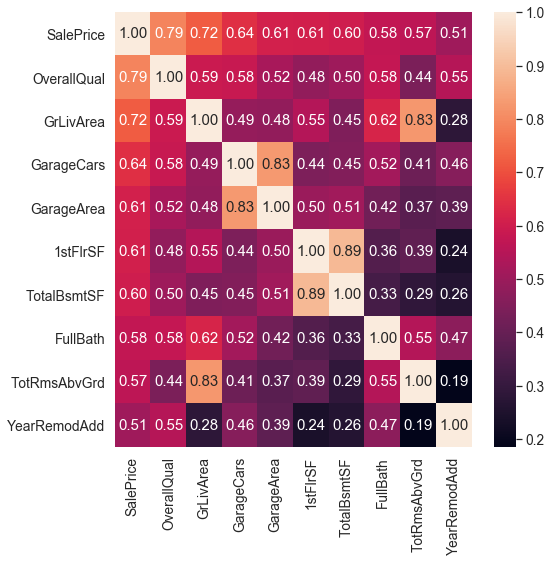

5. Теперь пришло время использовать модель линейной **полиномиальной** регрессии для параметров в списке ```important``` для прогнозирования ```SalePrice```. Пожалуйста, реализуйте функцию ```train_lin_poly_regressors(data, parameters, target="SalePrice", degree=1)```, которая будет обучать модель линейной **полиномиальной** регрессии в степени ```degree``` для ```n``` параметров из списка ```parameters```. Функция должна возвращать обученные модели линейной **полиномиальной** регрессии для каждого элемента списка ```parameters```.

In [100]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#Начало вашего кода 
def train_lin_poly_regressors(data, parameters, target="SalePrice", degree=1):
    coef = PolynomialFeatures(degree)
    regressors = {}
    for parameter in parameters:
        regressors[parameter] = LinearRegression().fit(coef.fit_transform(np.reshape(data[parameter].values, (-1, 1))), data[target].values)    
    return regressors
#Конец вашего кода

lin_poly_regressors = train_lin_poly_regressors(splitted_data["train"], important, target="SalePrice")
print(lin_poly_regressors)

{'OverallQual': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'GrLivArea': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'GarageCars': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'GarageArea': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), '1stFlrSF': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'TotalBsmtSF': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'FullBath': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'TotRmsAbvGrd': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'YearRemodAdd': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}


6. Спрогнозируйте ```"SalePrice"``` для набора данных ```validation``` с использованием обученной модели множественной линейной регрессии. Пожалуйста, реализуйте функцию ```validation(regressors, data, target="SalePrice")```, которая будет принимать обученную модель множественной линейной регрессии ```regressor```, данные ```validation``` и параметр ```target```, который должен быть предсказан. Функция должна возвращать ```DataFrame``` с первым столбцом, который будет истинным ```"SalePrice"```,  а второй столбцец предсказан моделью множественной линейной регрессии.

In [90]:
splitted_data["validation"]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
559,20,7943,4,5,1961,1961,192.0,903,0,126,...,64,0,39,0,0,0,0,4,2007,118500
1087,60,8935,7,5,2002,2002,95.0,0,0,831,...,144,68,0,0,0,0,0,7,2009,195000
1020,20,12085,8,5,2007,2007,328.0,1004,0,730,...,0,0,0,0,0,0,0,11,2007,318000
460,60,9803,7,5,2005,2005,0.0,400,0,466,...,0,108,0,0,0,0,0,2,2008,226700
802,20,8892,5,7,1953,1996,0.0,0,0,105,...,196,0,150,0,0,0,0,10,2008,116000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,20,7388,5,6,1959,2002,0.0,405,0,658,...,0,0,0,0,0,0,0,7,2007,150750
759,20,8529,7,5,2001,2001,0.0,20,0,1434,...,290,39,0,0,0,0,0,4,2009,189000
248,20,9600,6,6,1958,1988,183.0,620,620,0,...,289,0,0,0,0,0,0,4,2009,139000
991,60,13031,6,5,1995,1996,0.0,592,0,99,...,315,44,0,0,0,0,0,7,2006,187500


In [103]:
#Начало вашего кода
def validation(regressors, data, target="SalePrice", degree=1):
    features = {}
    for val in important:
        features[val] = PolynomialFeatures(degree).fit_transform(np.reshape(data[val].values, (-1, 1)))
    new_pd = pd.DataFrame([])
    new_pd[target] = data[target]
    for k,v in regressors.items():        
        new_pd[k] = regressors[k].predict(features[k])        
    return new_pd
#Конец вашего кода
pd_predictions = validation(lin_poly_regressors, splitted_data["validation"], target="SalePrice")
pd_predictions

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearRemodAdd
559,118500,83821.585488,132134.892580,118586.814906,126416.260241,169358.427220,179541.739582,140140.937402,144114.362610,138699.169483
1087,195000,223356.446597,201020.631361,197540.052635,184831.983133,145005.381659,156551.359507,222671.602189,200261.257202,218807.817430
1020,318000,269868.066967,209099.149063,276493.290364,294361.463555,256070.028838,261401.426214,222671.602189,200261.257202,228577.164740
460,226700,223356.446597,212810.900439,197540.052635,212529.093124,149310.212945,160615.315581,222671.602189,200261.257202,224669.425816
802,116000,130333.205858,119143.762763,197540.052635,164940.422320,154722.000848,72253.299231,140140.937402,144114.362610,207084.600657
...,...,...,...,...,...,...,...,...,...,...
120,150750,130333.205858,164667.301703,197540.052635,217816.723214,206010.990741,183489.582625,140140.937402,200261.257202,218807.817430
759,189000,223356.446597,176348.401623,197540.052635,193392.908039,219171.474958,228889.777622,222671.602189,172187.809906,216853.947968
248,139000,176844.826228,197963.894933,118586.814906,145804.237235,243524.520519,204041.589056,222671.602189,172187.809906,191453.644960
991,187500,176844.826228,183335.227744,197540.052635,163681.462775,127786.056516,140295.535211,222671.602189,172187.809906,207084.600657


### Ожидаемые результаты:

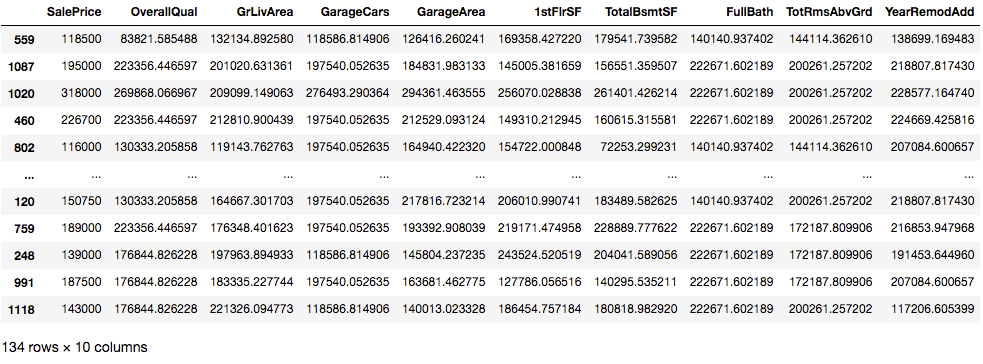

8. Постройте графики 3х3, где ось X - это истинные значения ```"SalePrice"```, а ось Y - ваши прогнозы.

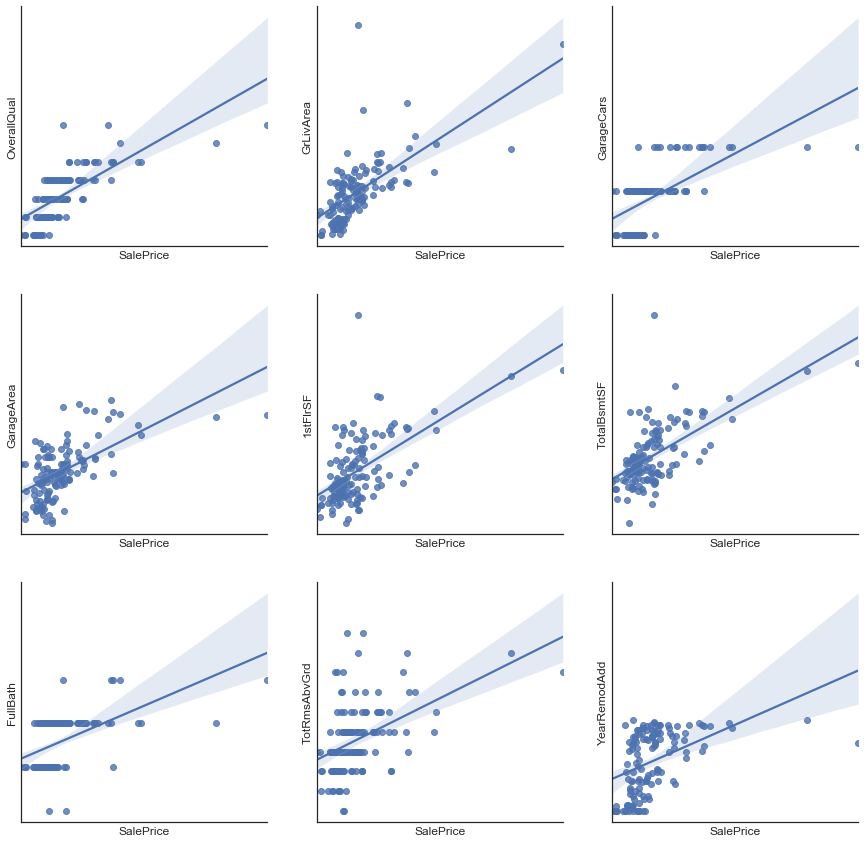

In [144]:
#Начало вашего кода 
def plot_comparison(data_pred):    
    sns.set(font_scale=1, style="white");
    f, axes = plt.subplots(3, 3, figsize=(15,15));    
    i = 0    
    for x in range(3):
        for y in range(3):
            sns.regplot(y=data_pred[important[i]], x= "SalePrice", data=data_pred, ax=axes[x, y]);
            axes[x, y].set_xticks([]);
            axes[x, y].set_yticks([]);
            i += 1
    sns.despine(); 
#Конец вашего кода

plot_comparison(pd_predictions)

### Ожидаемые результаты:

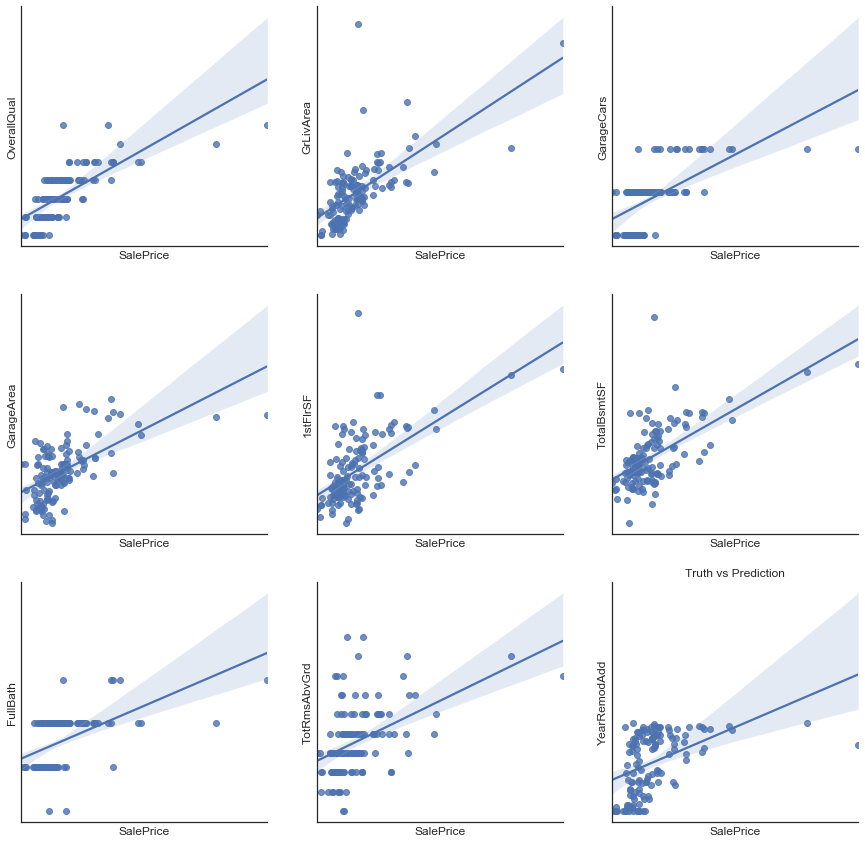

9. В задаче 5 мы обучили модели линейной полиномиальной регрессии степени 1 (то же самое что и простая линейная регрессия) для 9 самых коррелированных столбцов с «SalePrice». Теперь давайте попробуем степени по выше, такие как степени 2, 3, и 10.

линейная полиномиальная регрессия степени 2


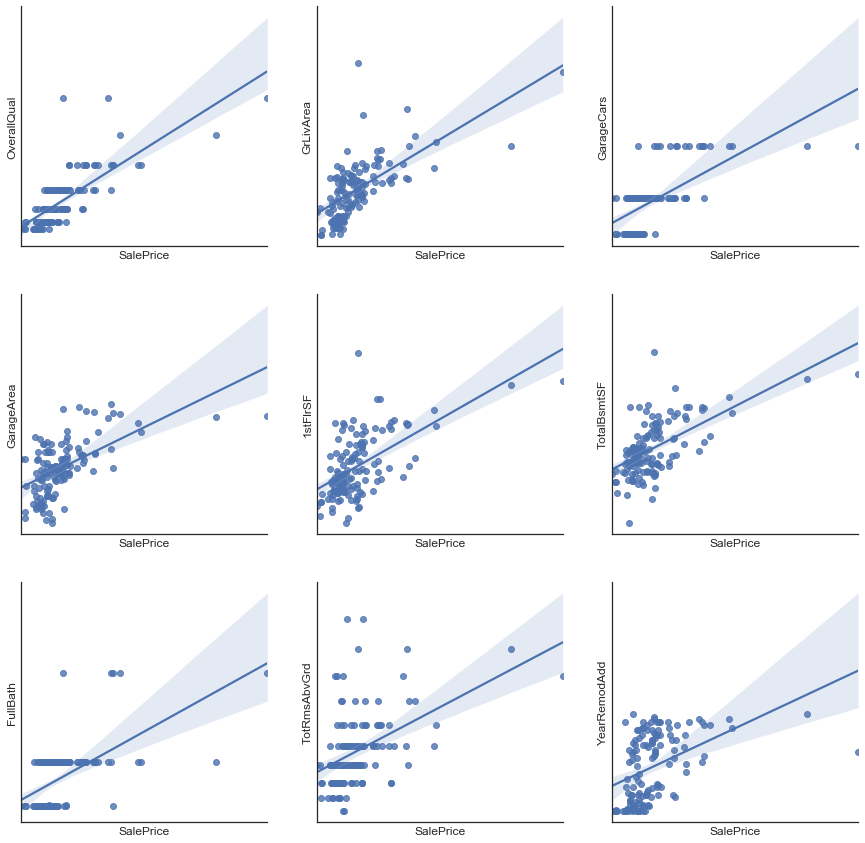

In [145]:
print("линейная полиномиальная регрессия степени 2")
#Начало вашего кода
train_2_degree = train_lin_poly_regressors(splitted_data["train"], important, target="SalePrice", degree=2)
res_2_degree = validation(train_2_degree, splitted_data["validation"], target="SalePrice", degree=2)
plot_comparison(res_2_degree)
#Конец вашего кода

### Ожидаемые результаты:
```
линейная полиномиальная регрессия степени 2
```

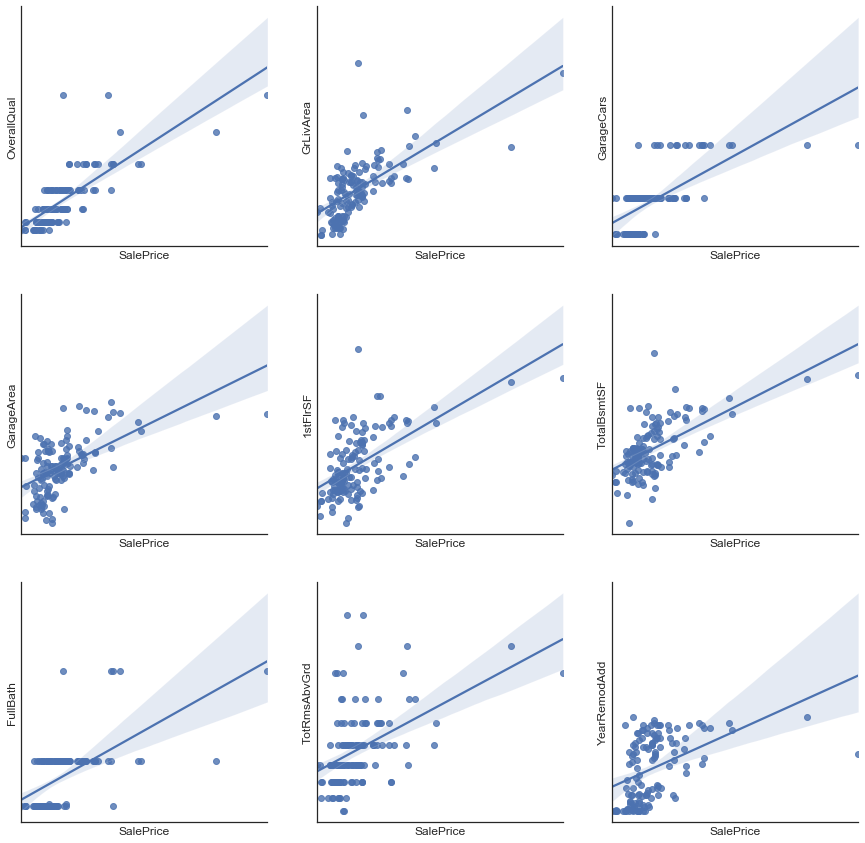


линейная полиномиальная регрессия степени 3


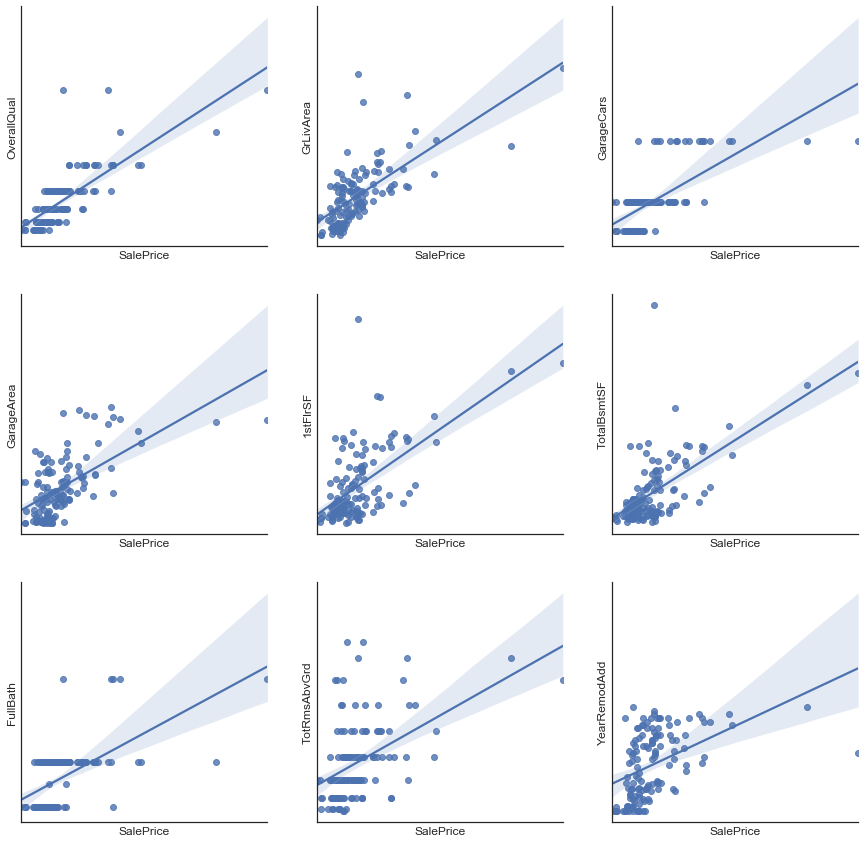

In [149]:
print("линейная полиномиальная регрессия степени 3")
#Начало вашего кода
train_3_degree = train_lin_poly_regressors(splitted_data["train"], important, target="SalePrice", degree=3)
res_3_degree = validation(train_3_degree, splitted_data["validation"], target="SalePrice", degree=3)
plot_comparison(res_3_degree)
#Конец вашего кода

### Ожидаемые результаты:
```
линейная полиномиальная регрессия степени 3
```

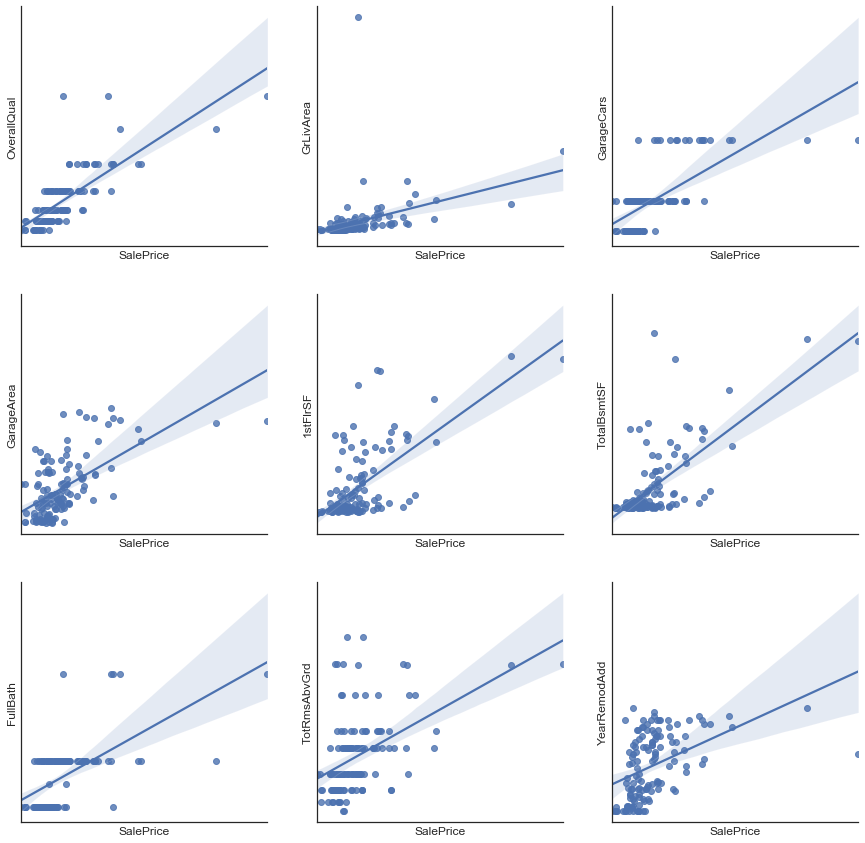


линейная полиномиальная регрессия степени 10


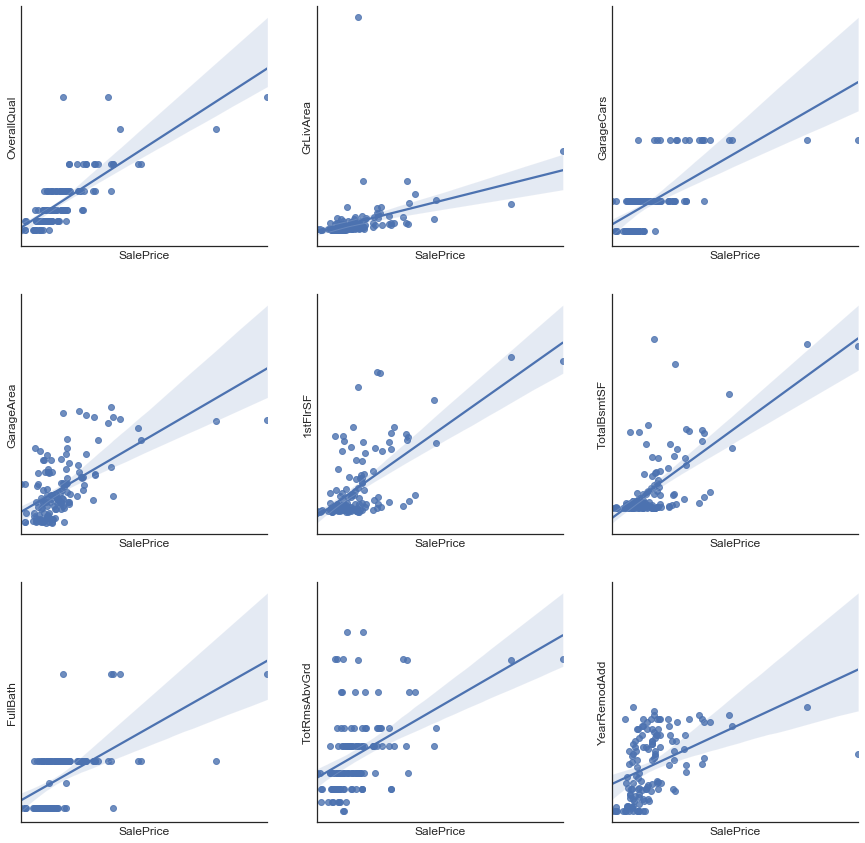

In [148]:
print("линейная полиномиальная регрессия степени 10")
#Начало вашего кода
train_10_degree = train_lin_poly_regressors(splitted_data["train"], important, target="SalePrice", degree=10)
res_10_degree = validation(train_10_degree, splitted_data["validation"], target="SalePrice", degree=10)
plot_comparison(res_10_degree)
#Конец вашего кода

### Ожидаемые результаты:
```
линейная полиномиальная регрессия степени 2
```

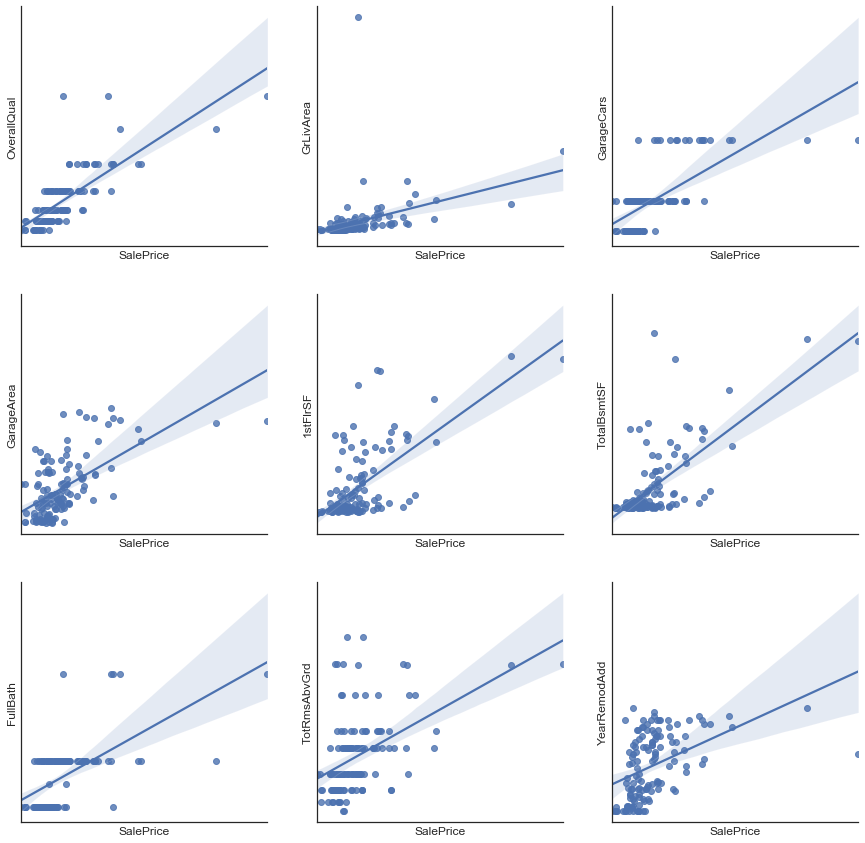


10. Пожалуйста, сделайте больше анализа прогнозов, улучшает ли результаты линейная полиномиальная регрессия?

Полиномиальная регрессия улучшает результаты так как сама апроксимация проходит гладко нежели линейная регрессия за счет степеней(degree). Полиномиальная регрессия охватывает больше точек что значительно улучшает предсказания модели.

### Отличная работа